## Predicting Heart Disease using machine learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart diesase basd on their medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

A version of the data is available here: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features

#### Create data dictionary 

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
*cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute


## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [5]:
# Import all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear insde our notebook
%matplotlib inline 


# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Load data

In [6]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with

1. What questions are you trying to solve?
2. WHat kind of data do we have and how do we treat different data types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data? 

In [7]:
#Lets find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

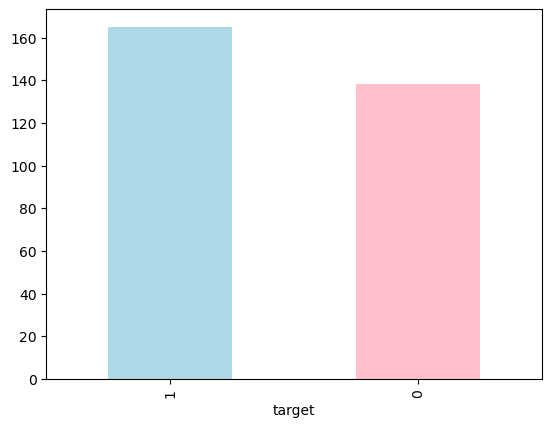

In [8]:
df["target"].value_counts().plot(kind="bar", color=["lightblue", "pink"]);
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 5. Modelling

In [13]:
# Split the data into X and Y
X = df.drop("target", axis=1)
y = df["target"]

# Split into training and testing datasets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now that we've got our data split into train and test sets, its time to we'll train it (find the parameters) on training set. 

And we'll test it (use the patterns) on the test set.

We're going to try out 3 different machine learning models:
1. Logistic Regressino
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [15]:
# Put models in a dictionary
models = {"Logisitc Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: A dictionary of different Scikitlearn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [16]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\Aditya\Desktop\heart_disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitc Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

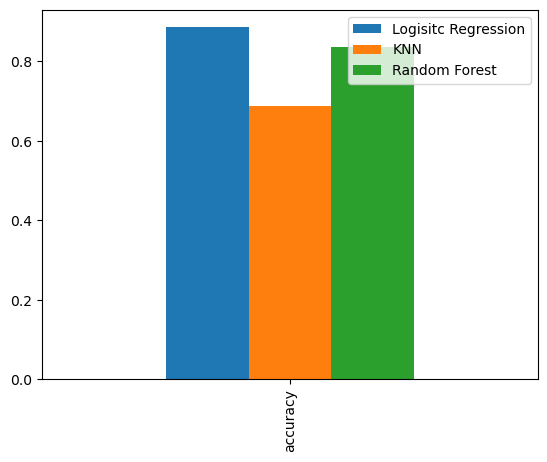

In [17]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar();
plt.show()

Now that we've got a baseline model.
We know a model's first predictions aren't always what we should based our next steps off. What should we do?

Lets look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under curve (AUC)

## Hyperparameter tuning

In [18]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for N-neighbors
neighbors = range(1, 21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [19]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [20]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max knn score on the test dataL: 75.409836%


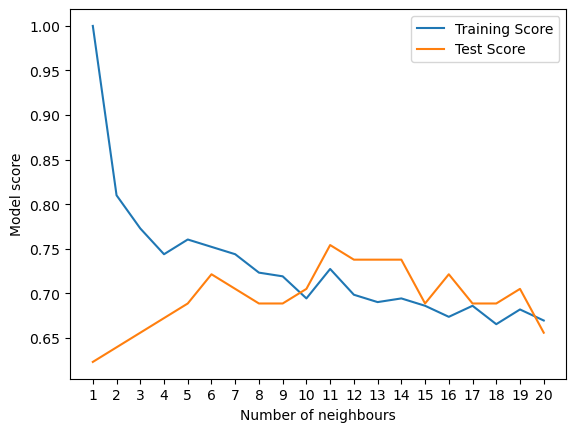

In [21]:
plt.plot(neighbors, train_scores, label="Training Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Max knn score on the test dataL: {max(test_scores)*100:2f}%")
plt.show()

## Hyperparameter Tuning with RandomisedSearchCV

We're going to tune LogisticRegrssion model and RandomForestClassfiier using RandomisedSearchCV

In [22]:
# Create a hyperparameter grid for LogisitcRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [23]:
# Tune LogisitcRegresion model
np.random.seed(42)

#Set up random hyperparameter search for Logitistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for LogisitcRegression
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [25]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned Logisitic Regression, we are going to do the same for RandomForestClassifier

In [ ]:
np.random.seed(42)
# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(X_test, y_test)

## Hyperparameter tuning with GridSearchCV

In [ ]:
# Different hyperparameter grid for LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True);

#Fit grid hyperparameter seacrh model
gs_log_reg.fit(X_train, y_train)


In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(X_test, y_test)

In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
# Plot ROC curve and calculate AUC metric
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(drawstyle="steps-post")
plt.show()

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, 
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show()

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, auc metric and Confusion matrix

Now let's get a classification report as well as cross validated precision, recall and f1 score

In [ ]:
print(classification_report(y_test, y_preds))

### Calculate evaluation metrix using cross-validation

We are going to calculate accuracy, precision, recall and f1 score of our model using cross validation and to do so we'll `be using cross_val_score()`

In [ ]:
#Check best hyperparameters
gs_log_reg.best_params_

In [ ]:
# Create a new classifier using best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [ ]:
# Cross validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = cv_acc.mean()

In [ ]:
# Cross validated precision

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = cv_precision.mean()

In [ ]:
# Cross validated recall

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = cv_recall.mean()

In [ ]:
# Cross validated f1 score

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = cv_f1.mean()

In [ ]:
# Visualise our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1 Score": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross Validated classification metrics", legend=False);
plt.show()

 ### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find out about feature importance is to search for "(MODEL NAME) feature importance"

Lets find the feature importance for our Logistic Regression model

In [ ]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train);

In [ ]:
# Check coef
clf.coef_

In [ ]:
# Match coef's of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

In [ ]:
# Visualise feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show()

In [ ]:
pd.crosstab(df['sex'], df["target"])

In [ ]:
pd.crosstab(df['slope'], df['target'])

Slope - the slope of the peak exercise ST segment

* 0: Upsloping - Better heart rate with exercise (uncommon)
* 1: Flatsloping - Minimal change (typical healthy heart)
* 2: Downsloping - Signs of an unhealthy heart

##### We can then see that Slope does have a large feature importance. A higher slope tends to lead to having heart disease!

## Experimentation

If you havent hit your evaluation metric yet... ask yourself...
 
* Could you collect more data?
* Could you try a better model? (CatBoost or XGBoost)
* Could you improve the current model? (Beyond what we have done so far)